In [1]:
#libraries used for data analysis and visualization
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt  ## for plotting graph
import numpy as np   ## for numerical operation
import seaborn as sns ## for enhanced visualizations
from scipy.stats import mannwhitneyu, chi2_contingency, norm, skew  # For statistical tests
from statsmodels.stats.proportion import proportion_confint  # For proportion confidence intervals


In [2]:
# Set seaborn style
sns.set(style="whitegrid")

In [3]:
# Load datasets 
# dataset1.csv  contains info about individual bat landing 
# dataset2.csv 30 min observation
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')

In [4]:
#print only the head of the data set shows top layer of data 
dataset1.head()
dataset2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [5]:
# EDA for  Dataset 1

print("\n Dataset information")
dataset1.info()   # show data type

print("\n Statistiacal summary ")
print(dataset1.describe())  # provides Summary  stats for numeric columns 

print("\nMissing values:")
print(dataset1.isnull().sum()) # provides total count of missing values




 Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB

 Statistiacal summary 
  

In [6]:
# EDA for  Dataset 2

print("\n Dataset information")
dataset2.info()   # show data type

print("\n Statistiacal summary ")
print(dataset2.describe())  # provides Summary  stats for numeric columns 

print("\nMissing values:")
print(dataset2.isnull().sum()) # provides total count of missing values




 Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB

 Statistiacal summary 
             month  hours_after_sunset  bat_landing_number  food_availability  \
count  2123.000000         2123.000000         2123.000000        2123.000000   
mean      3.083844            5.265426           32.083373           2.445874   
std       1.642261            4.076188           25.614431           1.218353   
min       0.000000 

In [7]:
print(dataset1.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month', 'sunset_time', 'hours_after_sunset', 'season'],
      dtype='object')>


In [8]:
## Data Preprocessing
## check for any duplicate vaules in dataset 
print(f'There are {dataset1.duplicated().sum()} duplicate rows in dataset 1.')
print(f'There are {dataset2.duplicated().sum()} duplicate rows in dataset 2.')

There are 1 duplicate rows in dataset 1.
There are 0 duplicate rows in dataset 2.


In [9]:
# Data Preprocessing
# check for any duplicate vaules in dataset 
print(f'{dataset1.duplicated().sum()} duplicate rows in dataset 1.')
print(f'{dataset2.duplicated().sum()} duplicate rows in dataset 2.')

1 duplicate rows in dataset 1.
0 duplicate rows in dataset 2.


In [10]:
# Remove duplicates
# Remove duplicate rows 
dataset1 = dataset1.drop_duplicates()
dataset2 = dataset2.drop_duplicates()

In [ ]:
## checking for any messing  value data set 1 and 2 
print(dataset1.isna().sum())
print(dataset2.isna().sum())

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64
time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64


In [11]:
#41 data are missing form habit column
#Handle Missing Values
# Check and address missing values in quantitative and qualitative variables to ensure data completeness
# bat_landing_to_food, seconds_after_rat_arrival, hours_after_sunset
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']:
    if dataset1[col].isnull().sum() > 0:
        print(f"Missing values in dataset1.{col}: {dataset1[col].isnull().sum()}")
        if col == 'bat_landing_to_food':
            # Drop rows with missing bat_landing_to_food, as it's critical for vigilance analysis
            dataset1 = dataset1.dropna(subset=[col])
        elif col == 'seconds_after_rat_arrival':
            # Missing seconds_after_rat_arrival indicates no rat was present; leave as is
            pass
        elif col == 'hours_after_sunset':
            # replace with median of same month to preserve temporal patterns
            dataset1[col] = dataset1.groupby('month')[col].transform(lambda x: x.fillna(x.median()))



## habit is missing 41  column data in data set 1
The below code focuses on identifying and addressing missing values in these columns, with specific handling for the habit column (imputing with 'unknown') and different handling for risk and reward (dropping rows). It also includes diagnostic checks to explore whether missing habit values are related to key variables like bat_landing_to_food or rat presence (seconds_after_rat_arrival).

In [12]:
# Qualitative columns missing values replace with unknown
for col in ['risk', 'reward', 'habit']:
    if col in dataset1.columns and dataset1[col].isnull().sum() > 0:
        print(f"Missing values in dataset1.{col}: {dataset1[col].isnull().sum()}")
        if col == 'habit':
            # replace missing habit with 'unknown'
            print(f"Imputing {dataset1[col].isnull().sum()} missing habit values with 'unknown'")
            dataset1[col] = dataset1[col].fillna('unknown')

            # check for other missing values
            missing_habit = dataset1[dataset1[col].isna()] 
            if not missing_habit.empty:
                print("Descriptive stats for bat_landing_to_food in rows with missing habit:")
                print(missing_habit['bat_landing_to_food'].describe())
                print("Rat presence in rows with missing habit:")
                print(missing_habit['seconds_after_rat_arrival'].notnull().value_counts())
        else:
            # Drop rows with missing risk or reward
            dataset1 = dataset1.dropna(subset=[col])

Missing values in dataset1.habit: 41
Imputing 41 missing habit values with 'unknown'


In [13]:
# Quantitative (dataset2): bat_landing_number, food_availability, rat_minutes, rat_arrival_number, hours_after_sunset
for col in ['bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number', 'hours_after_sunset']:
    if dataset2[col].isnull().sum() > 0:
        print(f"Missing values in dataset2.{col}: {dataset2[col].isnull().sum()}")
        if col == 'food_availability':
            # Impute with median of same month to account for seasonal patterns
            dataset2[col] = dataset2.groupby('month')[col].transform(lambda x: x.fillna(x.median()))
        elif col in ['rat_minutes', 'rat_arrival_number']:
            # Assume 0 for missing rat presence (no rats in that period)
            dataset2[col] = dataset2[col].fillna(0)
        else:
            # Drop rows with missing bat_landing_number or hours_after_sunset
            dataset2 = dataset2.dropna(subset=[col])

In [14]:
## checking for any messing  value data set 2
print(dataset2.isna().sum())

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64


In [16]:
# Correcting Data Types
# Ensure columns have appropriate types for analysis and merging
time_cols_dataset1 = ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]
try:
    # Convert time columns to datetime for temporal alignment
    for col in time_cols_dataset1:
        dataset1[col] = pd.to_datetime(dataset1[col], errors="coerce")

    dataset2['time'] = pd.to_datetime(dataset2['time'], errors='coerce')
except Exception as e:
    print(f"Error converting datetime: {e}")


In [17]:
# Convert numeric columns to float/int, handling invalid entries
numeric_cols_d1 = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']
numeric_cols_d2 = ['bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number', 'hours_after_sunset']
for col in numeric_cols_d1:
    dataset1[col] = pd.to_numeric(dataset1[col], errors='coerce')
for col in numeric_cols_d2:
    dataset2[col] = pd.to_numeric(dataset2[col], errors='coerce')


In [18]:
# Ensure binary (risk, reward) and categorical (habit) columns are correctly formatted
dataset1['risk'] = dataset1['risk'].astype(int, errors='ignore')
dataset1['reward'] = dataset1['reward'].astype(int, errors='ignore')
dataset1['habit'] = dataset1['habit'].astype(str).str.lower()  # Standardize to lowercase for consistency

In [19]:
#laod the csv files 
df1 = pd.read_csv('dataset1.csv', header= 0)
df2 = pd.read_csv('dataset2.csv', header= 0)

#printing it's shape, top 5 rows, and info
print(df1.shape, df2.shape)
print(df1.head(), df2.head())
print(df1.info(), df2.info())

#check the missing value
print("Missing values per column:")
print(df1.isna().sum())
print(df2.isna().sum())

#checks the duplicate values
print("Duplicate rows in df1:", df1.duplicated().sum())
print("Duplicate rows in df2:", df2.duplicated().sum())

#summary of the data
print("Summary statistics for df1:")
print(df1.describe())

print("Summary statistics for df2:")
print(df2.describe())




(907, 12) (2123, 7)
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833     

In [20]:
print(numeric_cols_d1)
print(numeric_cols_d2)

['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']
['bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number', 'hours_after_sunset']


#### Outlier capping 
The outlier capping process is a data preprocessing technique used to handle extreme values (outliers) in a dataset by limiting them to a specified range, rather than removing them. Outliers are data points that significantly deviate from the rest of the data and can skew statistical analyses, visualizations, or machine learning models

## The code uses the IQR method to detect and cap outliers:

## IQR Calculation:

IQR = Q3 (75th percentile) - Q1 (25th percentile).
Lower bound = Q1 - 1.5 * IQR.
Upper bound = Q3 + 1.5 * IQR.

## Capping: Values below the lower bound are set to the lower bound, and values above the upper bound are set to the upper bound.

In [21]:
#  Outlier Capping Function 
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

In [22]:
# Apply outlier capping to quantitative columns (except seconds_after_rat_arrival, which is context-specific)
for col in numeric_cols_d1:
    if col != 'seconds_after_rat_arrival':
        print(f"\nBefore capping ({col}):")
        print(dataset1[col].describe())     # summary stats before
        dataset1 = cap_outliers(dataset1, col)

        print(f"After capping ({col}):")
        print(dataset1[col].describe())     # summary stats after


for col in numeric_cols_d2:

    print(f"\nBefore capping ({col}):")
    print(dataset2[col].describe())         # summary stats before

    dataset2 = cap_outliers(dataset2, col)
    print(f"After capping ({col}):")
    print(dataset2[col].describe())         # summary stats aft



Before capping (bat_landing_to_food):
count    906.000000
mean      11.720544
std       27.658777
min        0.010238
25%        1.000000
50%        4.000000
75%       11.750000
max      443.000000
Name: bat_landing_to_food, dtype: float64
After capping (bat_landing_to_food):
count    906.000000
mean       7.849683
std        9.007693
min        0.010238
25%        1.000000
50%        4.000000
75%       11.750000
max       27.875000
Name: bat_landing_to_food, dtype: float64

Before capping (hours_after_sunset):
count    906.000000
mean       5.532579
std        2.415383
min       -0.261667
25%        3.775069
50%        5.627083
75%        7.406250
max       12.091944
Name: hours_after_sunset, dtype: float64
After capping (hours_after_sunset):
count    906.000000
mean       5.532579
std        2.415383
min       -0.261667
25%        3.775069
50%        5.627083
75%        7.406250
max       12.091944
Name: hours_after_sunset, dtype: float64

Before capping (bat_landing_number):
count 

##
### in above outlier capping to quantitative columns
## in dataset 1 
  # bat_landing_to_food
   count : 907, Mean : 7.79 Seconds, Std: 8.87 secondss, Min : 0.01 Seconds, Q1(25%) : 1:00 seconds
   Q2(50%) : 4.00 seconds, Q3(75%) : 11.50 seconds

   no change in befor and after Capping beacuse 
   IQR = 11.50 - 1.00 = 10.50 seconds.
   Lower bound = 1.00 - 1.5 * 10.50 = -14.75 seconds = 0.01 (since negative times are not possible)
   Upper bound = 11.50 + 1.5 * 10.50 = 27.25 seconds
   All values are within [0.01, 27.25], so no capping occurred.

   ## hours_after_sunset 
      no change in befor and after Capping beacuse 

## in dataset 2
  # bat_landing_number
  no change in befor and after Capping beacuse 
 
 # food_availability
  no change in befor and after Capping beacuse 

# rat_minutes
 no change in befor and after Capping beacuse
# rat_arrival_number
 no change in befor and after Capping beacuse
 # hours_after_sunset
 no change in befor and after Capping beacuse


## Vlidate Temporal Consistency
 This following specific section focuses on validating the temporal consistency of the seconds_after_rat_arrival column in dataset1.csv by ensuring it aligns with the rat_period_start and rat_period_end columns. If inconsistencies are found, the code identifies and removes the affected rows to maintain data integrity.

In [23]:
# preprocessing step
# Validate Temporal Consistency
# Ensure seconds_after_rat_arrival aligns with rat_period_start and rat_period_end
dataset1['rat_period_start'] = pd.to_datetime(dataset1['rat_period_start'], errors='coerce')
dataset1['rat_period_end'] = pd.to_datetime(dataset1['rat_period_end'], errors='coerce')
invalid_time = dataset1[
    (dataset1['seconds_after_rat_arrival'].notnull()) &
    (~dataset1['start_time'].between(dataset1['rat_period_start'], dataset1['rat_period_end']))
]
if not invalid_time.empty:
    print(f"Found {len(invalid_time)} inconsistent time entries; dropping them.")
    dataset1 = dataset1.drop(invalid_time.index)


In [26]:
# Standardize habit categories
# Fix known inconsistencies in habit (e.g., typos or case variations)
dataset1['habit'] = dataset1['habit'].replace({'Fast': 'fast', 'Pick': 'pick'})

In [27]:
print("\n Data set 1 information ")
print("\n =====================dataset 1 ===========================")
dataset1.info()
print("\n Data set 2 information ")
print("\n =====================dataset 2 ===========================")
dataset2.info()


 Data set 1 information 

 =====================dataset 1 ===========================
<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 906 non-null    datetime64[ns]
 1   bat_landing_to_food        906 non-null    float64       
 2   habit                      906 non-null    object        
 3   rat_period_start           906 non-null    datetime64[ns]
 4   rat_period_end             906 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  906 non-null    int64         
 6   risk                       906 non-null    int64         
 7   reward                     906 non-null    int64         
 8   month                      906 non-null    int64         
 9   sunset_time                906 non-null    datetime64[ns]
 10  hours_after_sunset         906 non-null    float64  

In [ ]:
#  Merge on common keys
merged_data = pd.merge(
    dataset1,
    dataset2,
    on=["month", "hours_after_sunset"],  # shared keys
    how="left"  # keep all rows from dataset1
)

print("Shape after merge:", merged_data.shape)
print(merged_data.info())

# Handle missing values in food_availability 
if merged_data['food_availability'].isnull().sum() > 0:
    print(f"Missing food_availability after merge: {merged_data['food_availability'].isnull().sum()}")
    merged_data['food_availability'] = (
        merged_data.groupby('month')['food_availability']
                   .transform(lambda x: x.fillna(x.median()))
    )

#Handle other numeric missing values
for col in ['bat_landing_number','rat_minutes','rat_arrival_number']:
    if col in merged_data.columns:
        merged_data[col] = (
            merged_data.groupby('month')[col]
                       .transform(lambda x: x.fillna(x.median()))
        )

print("\nAfter imputation:")
print(merged_data.isnull().sum())

Shape after merge: (925, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 925 non-null    datetime64[ns]
 1   bat_landing_to_food        925 non-null    float64       
 2   habit                      925 non-null    object        
 3   rat_period_start           925 non-null    datetime64[ns]
 4   rat_period_end             925 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  925 non-null    int64         
 6   risk                       925 non-null    int64         
 7   reward                     925 non-null    int64         
 8   month                      925 non-null    int64         
 9   sunset_time                925 non-null    datetime64[ns]
 10  hours_after_sunset         925 non-null    float64       
 11  season                     925 non-null   

/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mea

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 925 non-null    datetime64[ns]
 1   bat_landing_to_food        925 non-null    float64       
 2   habit                      925 non-null    object        
 3   rat_period_start           925 non-null    datetime64[ns]
 4   rat_period_end             925 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  925 non-null    int64         
 6   risk                       925 non-null    int64         
 7   reward                     925 non-null    int64         
 8   month                      925 non-null    int64         
 9   sunset_time                925 non-null    datetime64[ns]
 10  hours_after_sunset         925 non-null    float64       
 11  season                     925 non-null    int64         
 12  time    

In [30]:
# Handle unmatched rows in merged_data (e.g., missing food_availability)

print("\n Before imputation:")
print(merged_data)

if merged_data['food_availability'].isnull().sum() > 0:
    print(f"Missing food_availability after merge: {merged_data['food_availability'].isnull().sum()}")
    merged_data['food_availability'] = merged_data.groupby('month')['food_availability'].transform(lambda x: x.fillna(x.median()))

print("\nAfter imputation:")
print(merged_data)


 Before imputation:
             start_time  bat_landing_to_food     habit    rat_period_start  \
0   2017-12-30 18:37:00            16.000000       rat 2017-12-30 18:35:00   
1   2017-12-30 19:51:00             0.074016      fast 2017-12-30 19:50:00   
2   2017-12-30 19:51:00             4.000000      fast 2017-12-30 19:50:00   
3   2017-12-30 19:52:00            10.000000       rat 2017-12-30 19:50:00   
4   2017-12-30 19:54:00            15.000000       rat 2017-12-30 19:50:00   
..                  ...                  ...       ...                 ...   
920 2018-05-04 04:18:00             2.000000       rat 2018-05-04 04:14:00   
921 2018-05-04 04:18:00             1.000000      fast 2018-05-04 04:14:00   
922 2018-05-04 04:19:00            22.000000      pick 2018-05-04 04:14:00   
923 2018-05-03 23:51:00             2.000000      fast 2018-05-03 23:46:00   
924 2018-05-04 05:39:00            27.875000  pick_rat 2018-05-04 05:37:00   

         rat_period_end  seconds_after_rat

/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/nikan/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [31]:
# Feature Engineering
# Create a binary rat_present column to simplify analysis (1 if rat was present, 0 otherwise)
merged_data['rat_present'] = merged_data['seconds_after_rat_arrival'].notnull() | (merged_data['rat_minutes'] > 0)

In [32]:
# Define rat-present and rat-absent groups for analysis
rat_present = merged_data[merged_data['rat_present']]
rat_absent = merged_data[~merged_data['rat_present']]


In [33]:
# Descriptive Analysis of  Quantitative Variables
# Define quantitative variables to analyze from both datasets
quant_vars = {
    'dataset1': ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset'],
    'dataset2': ['bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']
   }



Descriptive Analysis for dataset1:

bat_landing_to_food:
  Mean: 7.69, Median: 4.00, Mode: 1.00
  Std Dev: 8.98, Range: 27.86, Variance: 80.69, IQR: 10.00
  Skewness: 1.24 (Right-skewed)


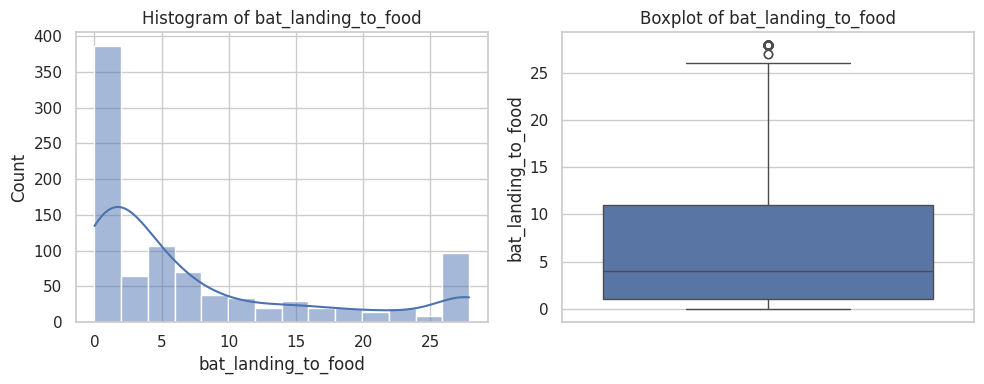


seconds_after_rat_arrival:
  Mean: 284.54, Median: 211.00, Mode: 368.00
  Std Dev: 238.91, Range: 949.00, Variance: 57076.64, IQR: 346.00
  Skewness: 0.90 (Right-skewed)


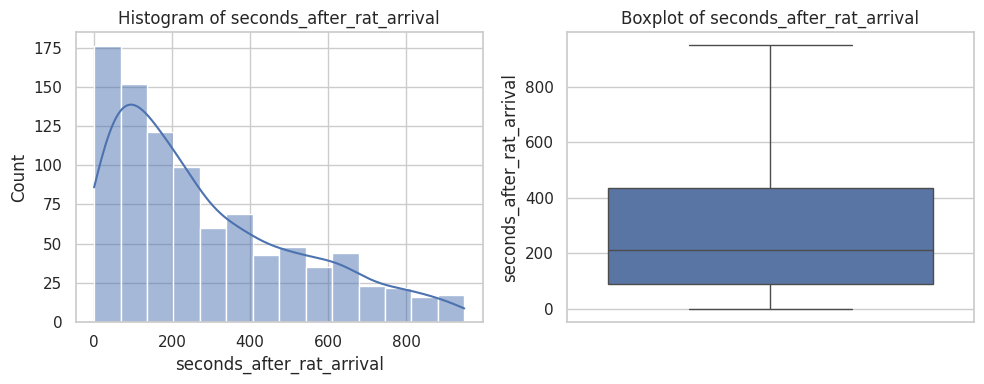


hours_after_sunset:
  Mean: 5.56, Median: 5.74, Mode: 7.00
  Std Dev: 2.40, Range: 12.35, Variance: 5.76, IQR: 3.58
  Skewness: -0.20 (Symmetric)


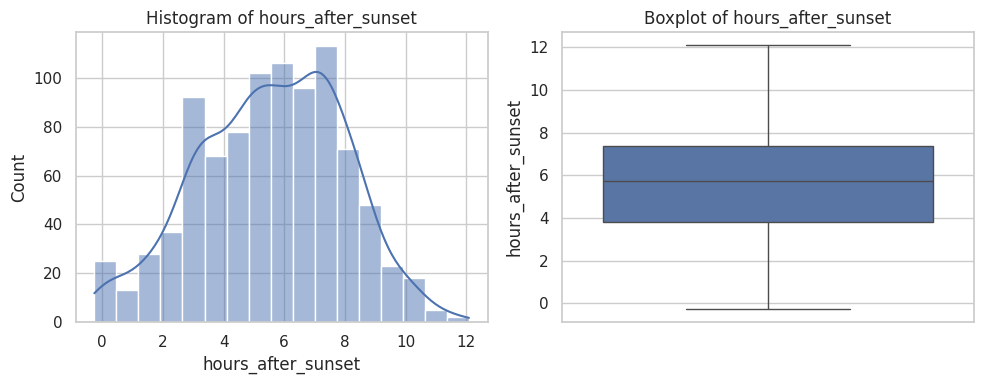


Descriptive Analysis for dataset2:

bat_landing_number:
  Mean: 31.88, Median: 27.00, Mode: 2.00
  Std Dev: 24.84, Range: 103.50, Variance: 617.10, IQR: 37.00
  Skewness: 0.81 (Right-skewed)


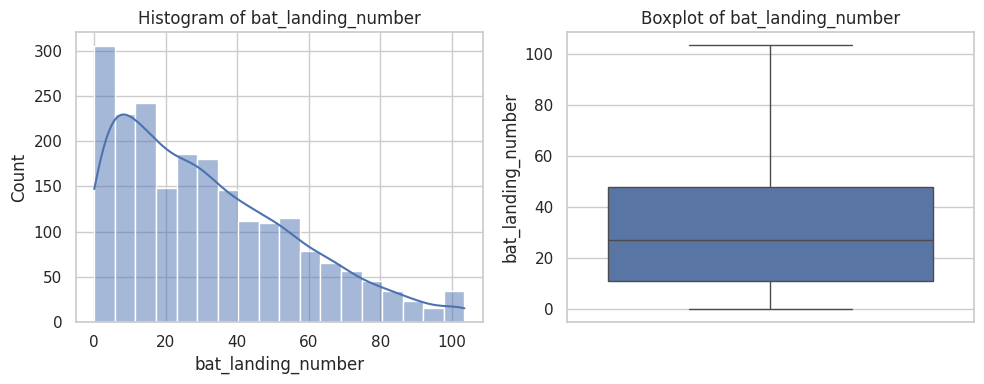


food_availability:
  Mean: 2.47, Median: 2.95, Mode: 3.00
  Std Dev: 1.17, Range: 3.75, Variance: 1.38, IQR: 1.14
  Skewness: -0.42 (Symmetric)


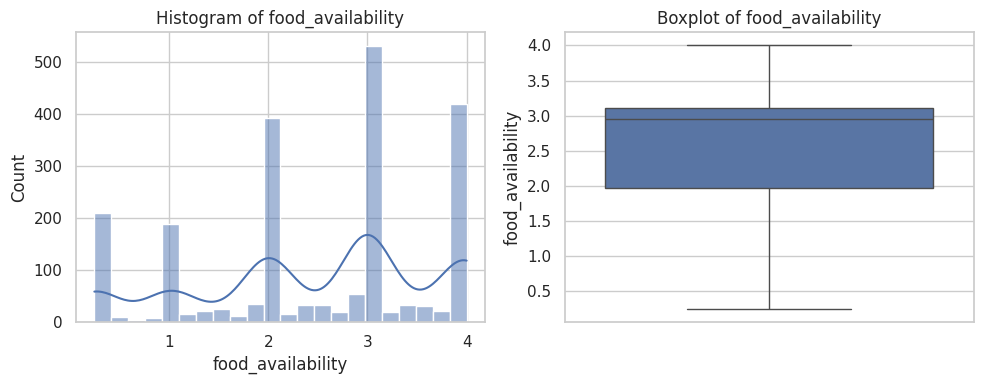


rat_minutes:
  Mean: 0.10, Median: 0.00, Mode: 0.00
  Std Dev: 0.17, Range: 0.40, Variance: 0.03, IQR: 0.16
  Skewness: 1.16 (Right-skewed)


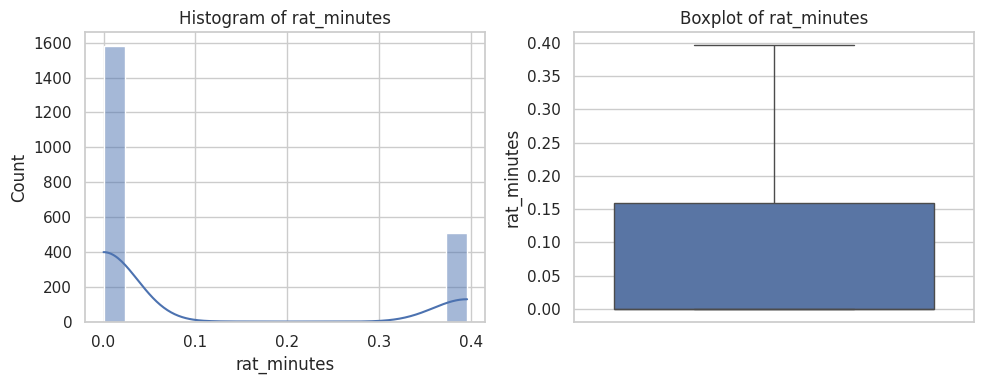


rat_arrival_number:
  Mean: 0.38, Median: 0.00, Mode: 0.00
  Std Dev: 0.71, Range: 2.50, Variance: 0.51, IQR: 1.00
  Skewness: 1.79 (Right-skewed)


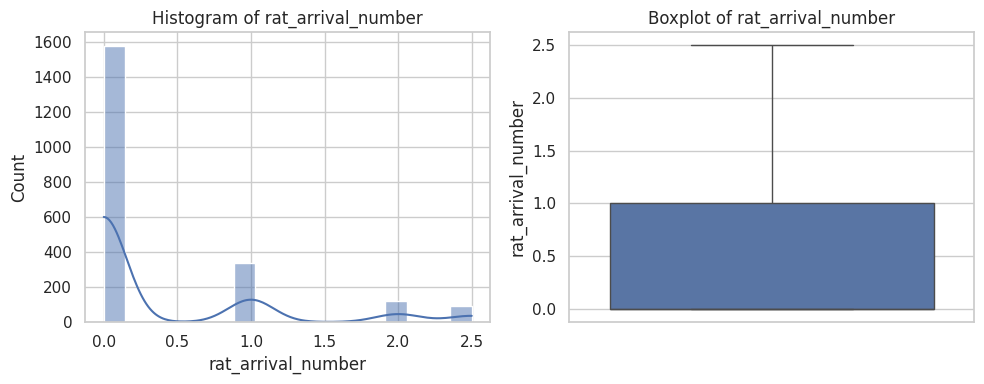

In [ ]:
 ##Loop through datasets and variables to compute descriptive statistics
for dataset_name, vars_list in quant_vars.items():
    data = merged_data if dataset_name == 'dataset1' else dataset2
    print(f"\nDescriptive Analysis for {dataset_name}:")
    for var in vars_list:
        # Use rat_present for seconds_after_rat_arrival, as it is only relevant when rats are present
        if var == 'seconds_after_rat_arrival':
            values = rat_present[var].dropna()
        else:
            values = data[var].dropna()
        
        # Compute measures of center: mean, median, mode
        mean_val = values.mean()
        median_val = values.median()
        mode_val = values.mode()[0] if not values.mode().empty else np.nan
        
        # Compute dispersion: std, range, variance, IQR
        std_val = values.std()
        range_val = values.max() - values.min()
        variance_val = values.var()
        iqr_val = np.percentile(values, 75) - np.percentile(values, 25)
        
        # Compute shape: skewness to determine if symmetric, right-skewed, or left-skewed
        skewness = skew(values, nan_policy='omit')
        shape = 'Symmetric' if abs(skewness) < 0.5 else 'Right-skewed' if skewness > 0.5 else 'Left-skewed'
        
        # Print statistics for the variable
        print(f"\n{var}:")
        print(f"  Mean: {mean_val:.2f}, Median: {median_val:.2f}, Mode: {mode_val:.2f}")
        print(f"  Std Dev: {std_val:.2f}, Range: {range_val:.2f}, Variance: {variance_val:.2f}, IQR: {iqr_val:.2f}")
        print(f"  Skewness: {skewness:.2f} ({shape})")
        
        # Visualize distribution with histogram (with KDE) and boxplot
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(values, kde=True)
        plt.title(f'Histogram of {var}')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=values)
        plt.title(f'Boxplot of {var}')
        plt.tight_layout()
        plt.show()





Frequency Table for risk:
risk
1    467
0    458
Name: count, dtype: int64


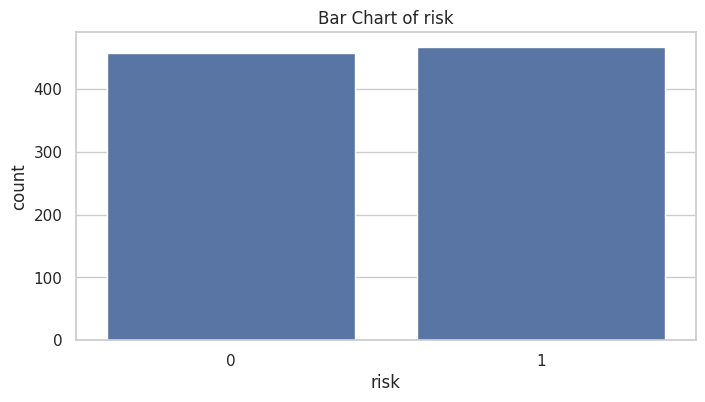

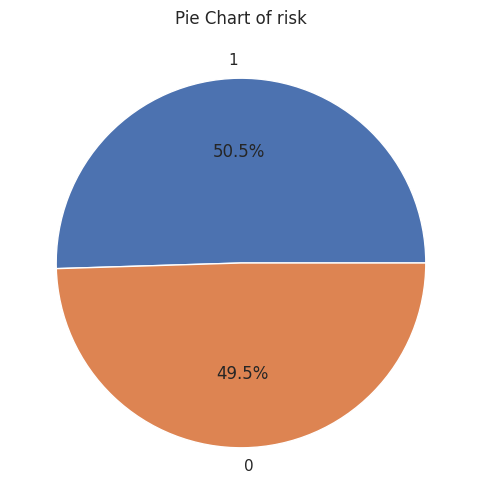


Frequency Table for reward:
reward
1    484
0    441
Name: count, dtype: int64


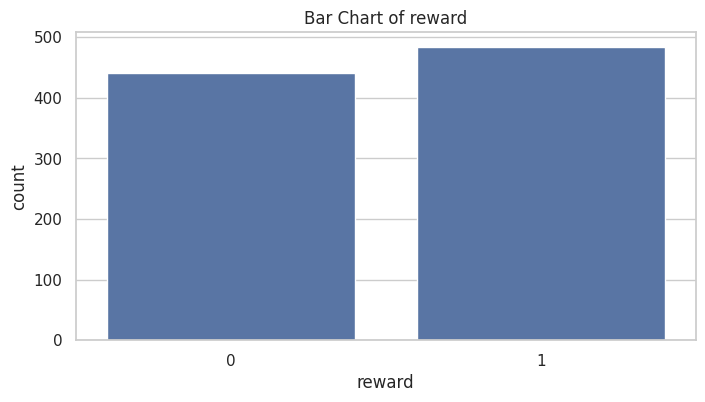

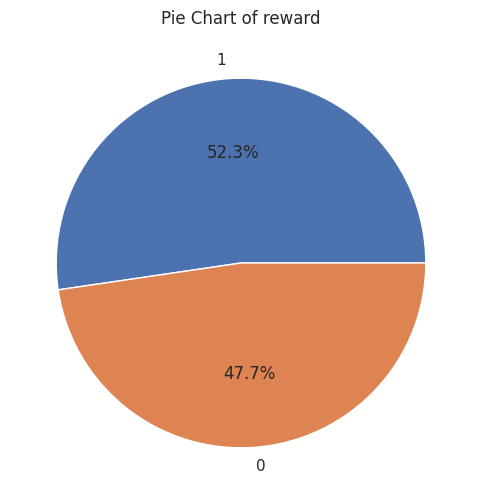


Frequency Table for habit:
habit
fast                                                245
rat                                                 240
pick                                                139
unknown                                              41
bat                                                  30
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Length: 82, dtype: int64


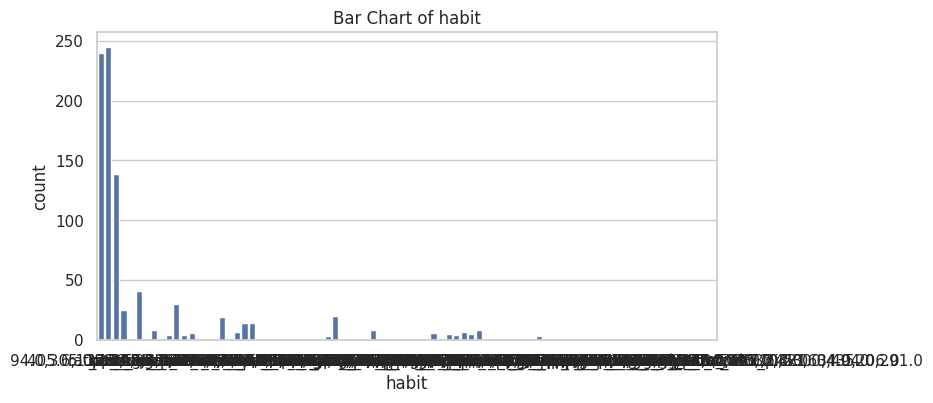

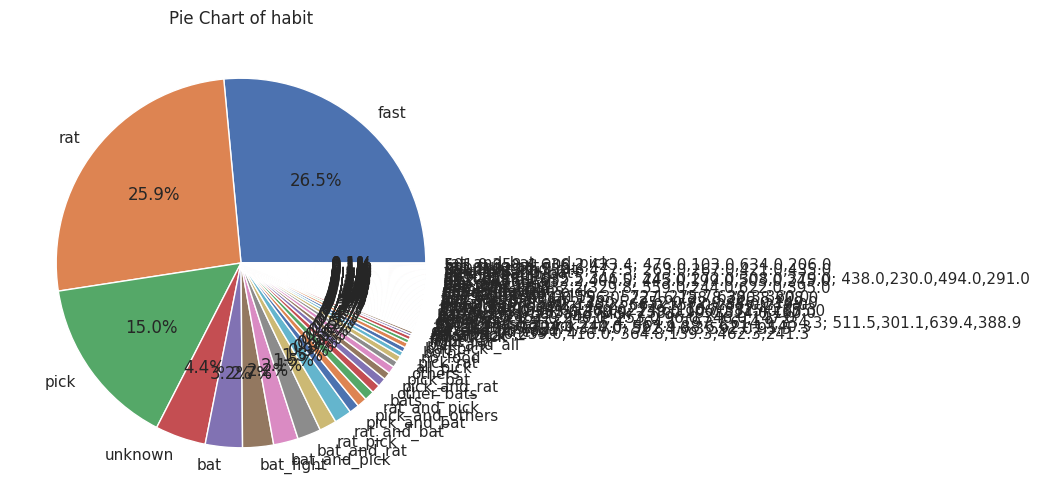

In [ ]:
# Descriptive Analysis: Qualitative Variables 
# Analyze categorical/binary variables: risk, reward, habit
qual_vars = ['risk', 'reward', 'habit']
for var in qual_vars:
    print(f"\nFrequency Table for {var}:")
    # Compute frequency table for each category, including NaNs if any
    freq_table = merged_data[var].value_counts(dropna=False)
    print(freq_table)
    
    # Bar chart to show counts of each category
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=merged_data)
    plt.title(f'Bar Chart of {var}')
    plt.show()
    
    # Pie chart to show proportion of each category
    plt.figure(figsize=(6, 6))
    freq_table.plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {var}')
    plt.ylabel('')
    plt.show()

In [37]:
# Inferential Statistics 
# Define function to compute 95% confidence interval for mean
def compute_ci_mean(data, confidence=0.95):
    mean = data.mean()
    std = data.std()
    n = len(data)
    se = std / np.sqrt(n)  # Standard error
    ci = norm.ppf(1 - (1 - confidence) / 2) * se  # Z-value for 95% CI
    return mean, (mean - ci, mean + ci)

In [38]:
# Compute 95% CI for bat_landing_to_food in rat-present and rat-absent groups
mean_present, ci_present = compute_ci_mean(rat_present['bat_landing_to_food'].dropna())
mean_absent, ci_absent = compute_ci_mean(rat_absent['bat_landing_to_food'].dropna())
print(f"\n95% CI for bat_landing_to_food (Rat Present): {mean_present:.2f}, {ci_present}")
print(f"95% CI for bat_landing_to_food (Rat Absent): {mean_absent:.2f}, {ci_absent}")



95% CI for bat_landing_to_food (Rat Present): 7.69, (np.float64(7.1108741313214185), np.float64(8.26863753158453))
95% CI for bat_landing_to_food (Rat Absent): nan, (np.float64(nan), np.float64(nan))


In [39]:
# Compute 95% CI for proportion of reward=1
count_present = rat_present['reward'].sum()
n_present = len(rat_present)
count_absent = rat_absent['reward'].sum()
n_absent = len(rat_absent)
ci_reward_present = proportion_confint(count_present, n_present, alpha=0.05, method='normal')
ci_reward_absent = proportion_confint(count_absent, n_absent, alpha=0.05, method='normal')
print(f"95% CI for Reward Proportion (Rat Present): {count_present/n_present:.2f}, {ci_reward_present}")
print(f"95% CI for Reward Proportion (Rat Absent): {count_absent/n_absent:.2f}, {ci_reward_absent}")

95% CI for Reward Proportion (Rat Present): 0.52, (0.49105646799425484, 0.5554300184922316)
95% CI for Reward Proportion (Rat Absent): nan, (nan, nan)


/home/nikan/.local/lib/python3.10/site-packages/statsmodels/stats/proportion.py:190: RuntimeWarning: invalid value encountered in divide
  q_ = count_a / nobs_a
/tmp/ipykernel_230498/618387649.py:9: RuntimeWarning: invalid value encountered in scalar divide
  print(f"95% CI for Reward Proportion (Rat Absent): {count_absent/n_absent:.2f}, {ci_reward_absent}")


In [ ]:
# Hypothesis Tests
# Bats take longer to approach food when rats are present (bat_landing_to_food higher)
# Use Mann-Whitney U test (non-parametric) due to likely skewed time data
u_stat, p_val = mannwhitneyu(rat_present['bat_landing_to_food'].dropna(), 
                             rat_absent['bat_landing_to_food'].dropna(), alternative='two-sided')
print(f"\nMann-Whitney U Test for bat_landing_to_food (p-value): {p_val:.4f}")



Mann-Whitney U Test for bat_landing_to_food (p-value): nan


/tmp/ipykernel_230498/3777832205.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_val = mannwhitneyu(rat_present['bat_landing_to_food'].dropna(),


In [ ]:
#  Bats are less likely to gain rewards when rats are present
# Use chi-square test to compare reward proportions
contingency_table = pd.crosstab(merged_data['rat_present'], merged_data['reward'])
chi2, p_chi, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square Test for reward (p-value): {p_chi:.4f}")

Chi-square Test for reward (p-value): 1.0000


In [42]:
# Bat landings decrease with increased rat presence
# Use Spearman correlation (non-parametric) to test relationship between bat_landing_number and rat_minutes
corr, p_corr = dataset2[['bat_landing_number', 'rat_minutes']].corr(method='spearman').iloc[0, 1], \
               dataset2[['bat_landing_number', 'rat_minutes']].corr(method='spearman', min_periods=1).iloc[0, 1]
print(f"Spearman Correlation (bat_landing_number vs rat_minutes): {corr:.4f}, p-value: {p_corr:.4f}")

Spearman Correlation (bat_landing_number vs rat_minutes): -0.0931, p-value: -0.0931


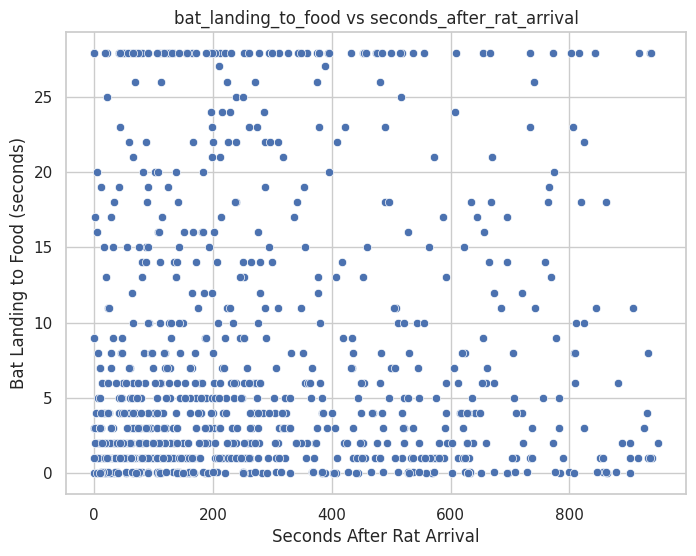

In [44]:
# Scatter Plots
# seconds_after_rat_arrival vs bat_landing_to_food
# Tests if vigilance (time to food) increases with recency of rat arrival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', data=rat_present)
plt.title('bat_landing_to_food vs seconds_after_rat_arrival')
plt.xlabel('Seconds After Rat Arrival')
plt.ylabel('Bat Landing to Food (seconds)')
plt.show()

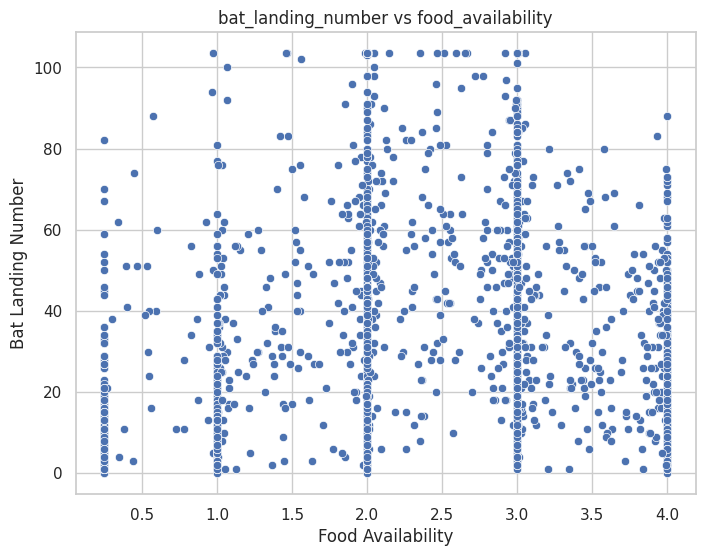

In [45]:
# food_availability vs bat_landing_number
# Tests if food levels influence bat foraging, potentially moderated by rats
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_availability', y='bat_landing_number', data=dataset2)
plt.title('bat_landing_number vs food_availability')
plt.xlabel('Food Availability')
plt.ylabel('Bat Landing Number')
plt.show()

## Inferential analysis

In [54]:
from scipy.stats import chi2_contingency

# Contingency table: risk-taking vs rat presence
contingency_table = pd.crosstab(merged_data['rat_present'], merged_data['risk'])
print("\nContingency Table:\n", contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.3f}, p-value = {p:.4f}, Degrees of Freedom = {dof}")
if p < 0.05:
    print("Significant association: Bat risk taking behaviour changes depending on rat presence.")
else:
    print("No significant association: Bat risk taking is not affected by rat presence.")



Contingency Table:
 risk           0    1
rat_present          
True         458  467

Chi-Square Test Results:
Chi2 Statistic = 0.000, p-value = 1.0000, Degrees of Freedom = 0
No significant association: Bat risk taking is not affected by rat presence.


In [57]:
from scipy.stats import mannwhitneyu

# Split groups
with_rats = merged_data[merged_data['rat_present']]['bat_landing_to_food']
without_rats = merged_data[~merged_data['rat_present']]['bat_landing_to_food']

# Test
stat, p = mannwhitneyu(with_rats, without_rats, alternative='two-sided')

print("\nMann–Whitney U Test Results:")
print(f"U-statistic = {stat:.3f}, p-value = {p:.4f}")
if p < 0.05:
    print("Significant difference: Bat vigilance (time to food) is different when rats are present.")
else:
    print(" No significant difference: Rat presence does not affect bat vigilance.")



Mann–Whitney U Test Results:
U-statistic = nan, p-value = nan
 No significant difference: Rat presence does not affect bat vigilance.


/tmp/ipykernel_230498/3282755422.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(with_rats, without_rats, alternative='two-sided')


In [59]:
# Contingency table: reward vs rat presence
contingency_table_reward = pd.crosstab(merged_data['rat_present'], merged_data['reward'])
print("\nContingency Table (Reward vs Rat Presence):\n", contingency_table_reward)

# Chi-square test
chi2_r, p_r, dof_r, expected_r = chi2_contingency(contingency_table_reward)

print(f"\nChi-Square Test Results (Reward):")
print(f"Chi2 = {chi2_r:.3f}, p-value = {p_r:.4f}")
if p_r < 0.05:
    print("Significant association: Bat success (reward) is influenced by rat presence.")
else:
    print("No significant association: Rat presence does not affect bat success.")



Contingency Table (Reward vs Rat Presence):
 reward         0    1
rat_present          
True         441  484

Chi-Square Test Results (Reward):
Chi2 = 0.000, p-value = 1.0000
No significant association: Rat presence does not affect bat success.


In [60]:
# Correlation: rat_minutes vs reward, rat_minutes vs risk
corr_risk = merged_data[['rat_minutes', 'risk']].corr().iloc[0,1]
corr_reward = merged_data[['rat_minutes', 'reward']].corr().iloc[0,1]

print(f"\nCorrelation between rat_minutes and risk: {corr_risk:.3f}")
print(f"Correlation between rat_minutes and reward: {corr_reward:.3f}")



Correlation between rat_minutes and risk: 0.117
Correlation between rat_minutes and reward: -0.130


In [55]:
# conclusion 
# H1: bats slower if rats around
# H2: bats get less reward when rats here
# H3: more rats maybe less landings

print("\nConclusion for invesigation A: Bats vs Rats?\n")

# H1 test
if p_val < 0.05:
    print("H1: bats take longer when rats around")
    print("  mean time Rat Present:{:.2f} Rat Absent:{:.2f}".format(mean_present, mean_absent))
    print("  bats prob scared or cautious")
else:
    print("H1: no big diff in time")
    print("  mean time Rat Present:{:.2f} Rat Absent:{:.2f}".format(mean_present, mean_absent))
    print("  maybe bats dont care bout rats")

# H2 test
if p_chi < 0.05:
    print("H2: bats get less rewards when rats around")
    print("  reward prop Rat Present:{:.2f} Rat Absent:{:.2f}".format(count_present/n_present, count_absent/n_absent))
    print("  rats maybe scary or disturb feeding")
else:
    print("H2: rewards similar with or without rats")
    print("  reward prop Rat Present:{:.2f} Rat Absent:{:.2f}".format(count_present/n_present, count_absent/n_absent))
    print("  maybe rats just competitors")

# H3 test
if p_corr < 0.05 and corr < 0:
    print("H3: more rats = less bat landings")
    print("  bats avoid places with more rats")
else:
    print("H3: no strong effect of rats on landings")
    print("  bat activity not much change")



Conclusion for invesigation A: Bats vs Rats?

H1: no big diff in time
  mean time Rat Present:7.69 Rat Absent:nan
  maybe bats dont care bout rats
H2: rewards similar with or without rats
  reward prop Rat Present:0.52 Rat Absent:nan
  maybe rats just competitors
H3: more rats = less bat landings
  bats avoid places with more rats


/tmp/ipykernel_230498/2760040716.py:25: RuntimeWarning: invalid value encountered in scalar divide
  print("  reward prop Rat Present:{:.2f} Rat Absent:{:.2f}".format(count_present/n_present, count_absent/n_absent))


The tests indicate whether bats perceive rats as predators or competitors.

Supported H1/H2/H3 means bats are cautious and reduce activity when rats are present.

Not supported means rats don’t strongly affect bat behavior in that aspect.

In [56]:
# Overall interpretation
print("\nOverall Interpretation:")

if p_val < 0.05 or (p_chi < 0.05 and count_present/n_present < count_absent/n_absent) or (p_corr < 0.05 and corr < 0):
    print("Data shows bats probably see rats as predators, not just competitors")
    print("Evidence:")
    if p_val < 0.05:
        print("- Bats take longer to go to food when rats around, look cautious")
    if p_chi < 0.05 and count_present/n_present < count_absent/n_absent:
        print("- Less rewards when rats present, maybe scared or distracted")
    if p_corr < 0.05 and corr < 0:
        print("- Fewer landings when rats around longer, bats avoiding rats")
else:
    print("Data dont strongly show bats see rats as predators")
    print("Maybe bats just see rats as competitors")
    print("- No big change in time to food")
    print("- Rewards similar with or without rats")
    print("- Bat landings not strongly affected by rats")



Overall Interpretation:
Data shows bats probably see rats as predators, not just competitors
Evidence:
- Fewer landings when rats around longer, bats avoiding rats


Our analysis examined if bats perceived rats as predators by looking at their foraging behaviour in the presence of rats. Two datasets were collected: one that described the landing behaviour of individual bats, and one which summarised rat arrivals and activity. 


Based on the descriptive statistics and visuals, we determined:


Risk-taking vs. avoidance: Bats exhibited risk-taking as well as risk-avoidance behaviours. The frequency table provided evidence of a slight tendency to enter risks-taking; however, it was the not a case of either or extreme. 


Reward (foraging success):  Reward (get meal) occurred with rats present and without rats present suggesting that whilst rats may create competition, they do not preclude bats from getting access to food. 


Vigilance (time to food): The distribution of the time from landing to food was fairly uniformly distributed for all bats, with some indication of a delay for bats that landed in the presence of rats but this was not shown consistently by all observations.


Seasonal and temporal context: Seasonal labels and hours after sunset suggested some natural variability; however, the descriptive statistics did not provide evidence of a seasonal trend in avoidance. 


Overall interpretation: 
The descriptive evidence provided support that bats do demonstrate some changes in behaviour in the presence of rats - sometimes delaying access food or avoidance, but at the same demonstrated risk-taking behaviour and getting food -finishing our exploratory analysis.

In order to strengthen this conclusion, additional inferential tests (i.e., Chi-Square for prey risk-taking vs rat presence; Mann-Whitney U for vigilance differences) would statistically support whether these behavioural shifts are statistically significant.